<a href="https://colab.research.google.com/github/J0SAL/Learning-ML/blob/main/Codebasis/FeatureEngineering/2_Outliers_z-score/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Outlier Detection and Removal - Z Score and Std Deviation


You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [14]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score

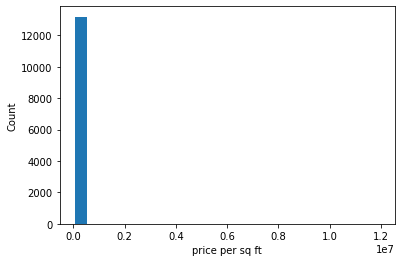

In [15]:
plt.hist(df.price_per_sqft, bins = 20, rwidth=0.8)
plt.xlabel('price per sq ft')
plt.ylabel('Count')
plt.show()


Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

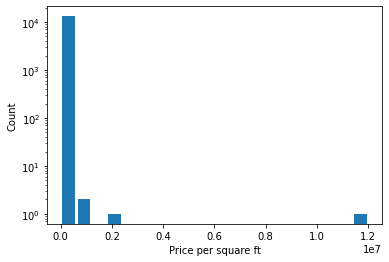

In [16]:
plt.hist(df.price_per_sqft, bins = 20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

(1) Treat outliers using percentile first

In [17]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000099)

In [18]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]

In [19]:
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7575,other,1 BHK,425.0,1.0,750.0,1,176470
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
12355,other,4 BHK,16335.0,4.0,149.0,4,912
7012,other,1 BHK,650.0,1.0,500.0,1,76923


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [21]:
df2 = df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]
df2.shape

(13172, 7)

In [22]:
df.shape

(13200, 7)

In [23]:
##we removed 28 outliers
df.shape[0] - df2.shape[0]

28


**(2) Now remove outliers using 4 standard deviation**

In [24]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [26]:

df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
6391,other,5 Bedroom,4000.0,4.0,1000.0,5,25000
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285
8861,Cunningham Road,5 Bedroom,2925.0,5.0,936.0,5,32000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
6864,5th Block Hbr Layout,9 Bedroom,2600.0,12.0,675.0,9,25961
13013,other,4 Bedroom,1200.0,5.0,350.0,4,29166
11919,other,3 Bedroom,1524.0,4.0,400.0,3,26246
2825,HBR Layout,9 Bedroom,1200.0,6.0,280.0,9,23333
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.0,5,30000


In [28]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [29]:
##removed 125 outliers

df2.shape[0]-df3.shape[0]

125

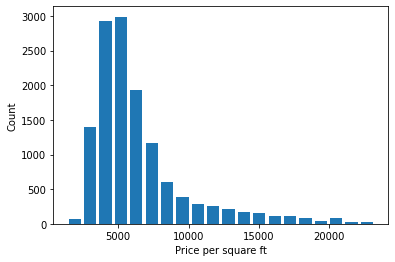

In [30]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

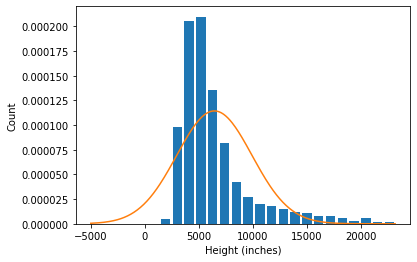

In [31]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

**(3) Now remove outliers using z score. Use z score of 4 as your thresold**

In [32]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
4707,Haralur Road,3 BHK,1255.0,3.0,130.00,3,10358,0.892134
10222,9th Phase JP Nagar,3 BHK,1571.0,3.0,65.00,3,4137,-0.610152
5812,other,3 BHK,1750.0,3.0,170.00,3,9714,0.736617
7420,other,3 BHK,1440.0,3.0,72.00,3,5000,-0.401750
5863,other,1 Bedroom,1200.0,2.0,45.00,1,3750,-0.703608
10568,NRI Layout,4 Bedroom,800.0,5.0,95.50,4,11937,1.273441
5475,HRBR Layout,6 Bedroom,1200.0,6.0,250.00,6,20833,3.421704
8464,Thanisandra,2 BHK,1183.0,2.0,58.56,2,4950,-0.413824
2981,Hebbal,2 BHK,1100.0,2.0,47.00,2,4272,-0.577552
31,Bisuvanahalli,3 BHK,1075.0,2.0,35.00,3,3255,-0.823143


In [33]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [34]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625,6.993770
5144,Rajaji Nagar,3 Bedroom,2790.0,3.0,950.0,3,34050,6.613429
4119,other,4 Bedroom,7000.0,5.0,2050.0,4,29285,5.462746
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500,5.031693
11696,other,4 Bedroom,2360.0,4.0,601.0,4,25466,4.540510


In [35]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [36]:
##also removed 125 outliers, same as 4 std deviation

df2.shape[0] - df4.shape[0]

125